## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [11]:
print(df.info())
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"\nNumber of categorical variables: {len(categorical_columns)}")
print(f"Categorical columns: {categorical_columns.tolist()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None

Number 

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [18]:
for i in range(len(df.columns)):
    missing_data = df.isna().sum()
    perc = missing_data / len(df) * 100
    for i, (column, missing_count) in enumerate(missing_data.items(), start=1):
        missing_percentage = perc[column]
        print(f"Feature {i} >> Missing entries: {missing_count}  |  Percentage: {missing_percentage:.2f}")

Feature 1 >> Missing entries: 0  |  Percentage: 0.00
Feature 2 >> Missing entries: 0  |  Percentage: 0.00
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.00
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.00
Feature 8 >> Missing entries: 0  |  Percentage: 0.00
Feature 9 >> Missing entries: 0  |  Percentage: 0.00
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.00
Feature 12 >> Missing entries: 0  |  Percentage: 0.00
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.00
Feature 1 >> Missing entries: 0  |  Percentage: 0.00
Feature 2 >> Missing entries: 0  |  Percentage: 0.00
Feature 3 >> Missing entries: 1

### Bonus: Visual representation of missing values

<Axes: >

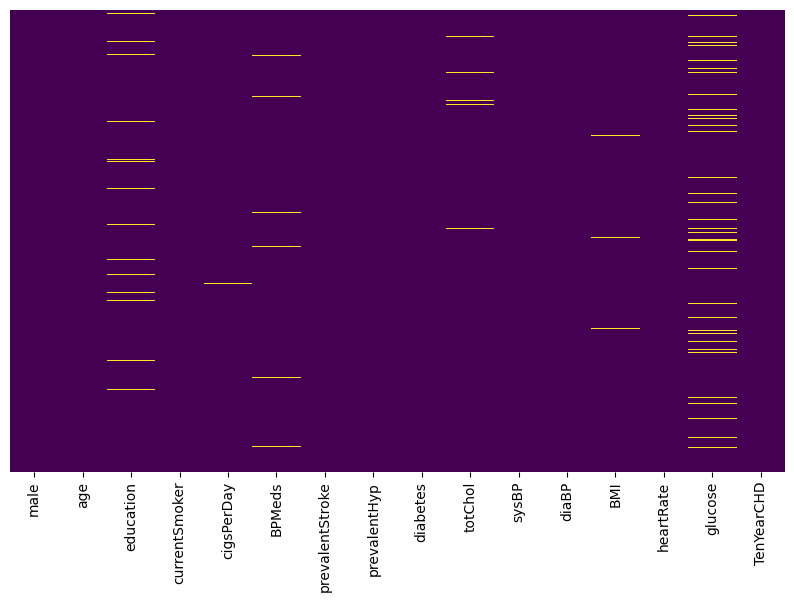

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [20]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [21]:
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [27]:
data = df.values


In [26]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [28]:
# Create SimpleImputer object with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer model on the dataset
imputer.fit(df)

# View calculated statistics
print("Statistics (Mean of each column):")
print(imputer.statistics_)

Statistics (Mean of each column):
[4.29211892e-01 4.95849457e+01 1.97894992e+00 4.94100991e-01
 9.00308862e+00 2.96296296e-02 5.89900897e-03 3.10523832e-01
 2.57196791e-02 2.36721585e+02 1.32352407e+02 8.28934639e+01
 2.58020076e+01 7.58789238e+01 8.19667532e+01 1.51958471e-01]


### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [29]:
# Transform the dataset to fill missing values
filled_data = imputer.transform(df)

# Convert back to DataFrame to maintain column names
filled_df = pd.DataFrame(filled_data, columns=df.columns)

print("Dataset with Missing Values Filled:")
print(filled_df.head())

Dataset with Missing Values Filled:
   male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   
4   0.0  46.0        3.0            1.0        23.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           0.0       0.0    195.0  106.0   70.0  26.97       80.0     77.0   
1           0.0       0.0    250.0  121.0   81.0  28.73       95.0     76.0   
2           0.0       0.0    245.0  127.5   80.0  25.34       75.0     70.0   
3           1.0       0.0    225.0  150.0   95.0  28.58       65.0    103.0   
4           0.0       0.0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYe

### Sanity Check: Whether missing values are filled or not

In [30]:
missing_values_after = filled_df.isna().sum()

print("Sanity Check: Missing Values After Imputation")
print(missing_values_after)

Sanity Check: Missing Values After Imputation
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Let's try to visualize the missing values.

<Axes: >

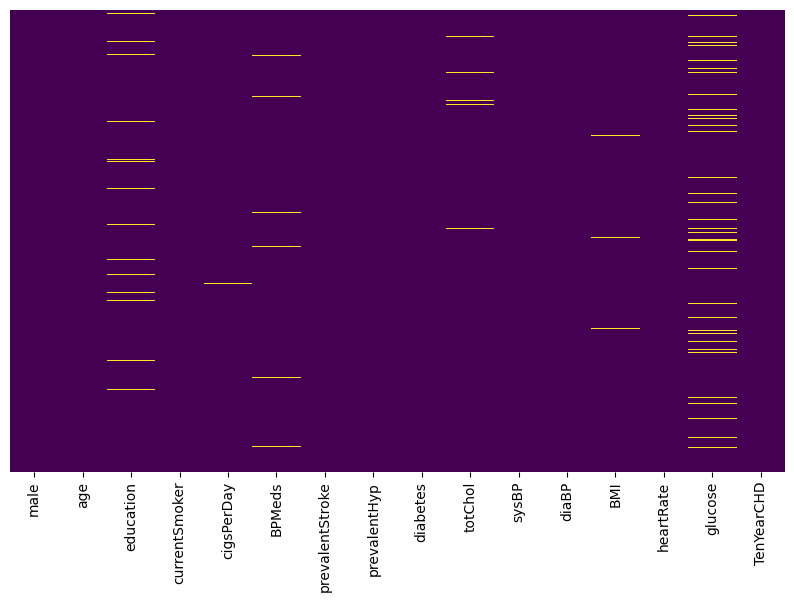

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(filled_data.isna(), cbar=False, cmap='viridis', yticklabels=False)

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

<Figure size 1000x600 with 0 Axes>

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [36]:
filled_df = pd.DataFrame(filled_data, columns=df.columns)

pd.set_option('display.float_format', '{:,.6f}'.format)  # This sets the format for floating point numbers

# Display the first few rows of the DataFrame
print(filled_df.head())


      male       age  education  currentSmoker  cigsPerDay   BPMeds  \
0 1.000000 39.000000   4.000000       0.000000    0.000000 0.000000   
1 0.000000 46.000000   2.000000       0.000000    0.000000 0.000000   
2 1.000000 48.000000   1.000000       1.000000   20.000000 0.000000   
3 0.000000 61.000000   3.000000       1.000000   30.000000 0.000000   
4 0.000000 46.000000   3.000000       1.000000   23.000000 0.000000   

   prevalentStroke  prevalentHyp  diabetes    totChol      sysBP     diaBP  \
0         0.000000      0.000000  0.000000 195.000000 106.000000 70.000000   
1         0.000000      0.000000  0.000000 250.000000 121.000000 81.000000   
2         0.000000      0.000000  0.000000 245.000000 127.500000 80.000000   
3         0.000000      1.000000  0.000000 225.000000 150.000000 95.000000   
4         0.000000      0.000000  0.000000 285.000000 130.000000 84.000000   

        BMI  heartRate    glucose  TenYearCHD  
0 26.970000  80.000000  77.000000    0.000000  
1 28.730

<Axes: >

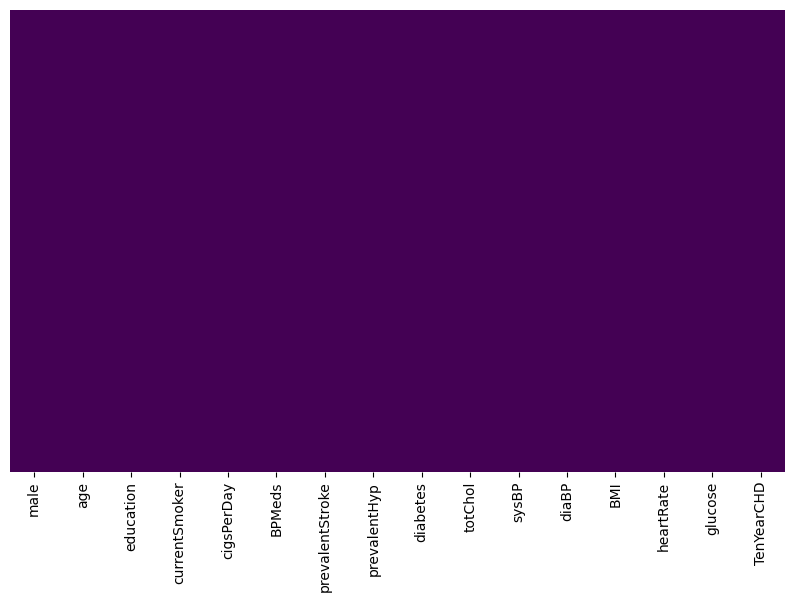

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(filled_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [39]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [40]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

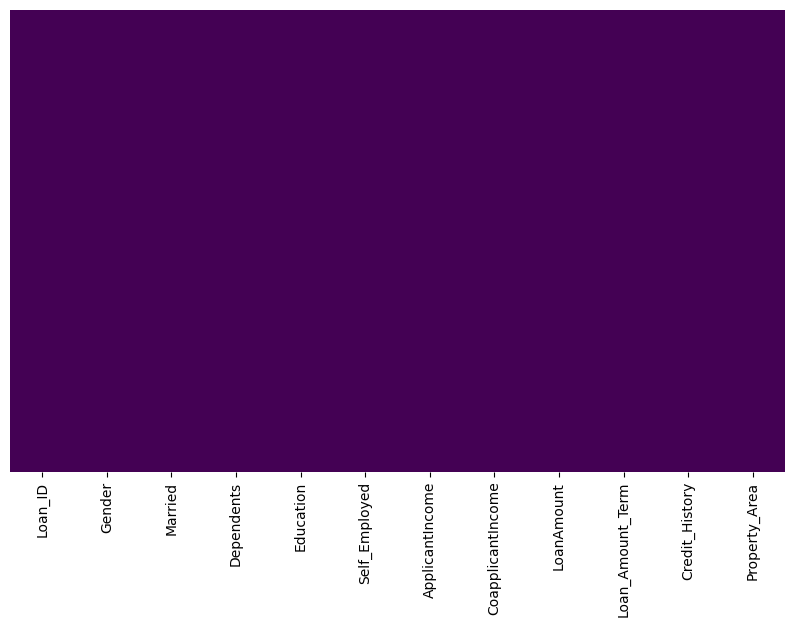

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [42]:
print(X_train.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


# Build a Logistic Regression model Without imputation

In [43]:
df=pd.read_csv("heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X,y)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [48]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.000000,1,1.000000,0.000000,0,1,0,313.000000,179.000000,92.000000,25.970000,66.000000,86.000000,1
4234,1,51,3.000000,1,43.000000,0.000000,0,0,0,207.000000,126.500000,80.000000,19.710000,65.000000,68.000000,0
4235,0,48,2.000000,1,20.000000,NaN,0,0,0,248.000000,131.000000,72.000000,22.000000,84.000000,86.000000,0
4236,0,44,1.000000,1,15.000000,0.000000,0,0,0,210.000000,126.500000,87.000000,19.160000,86.000000,NaN,0


In [49]:
df.shape

(4238, 16)

### Drop rows with missing values

In [50]:
df.dropna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.000000,0,0.000000,0.000000,0,1,0,187.000000,141.000000,81.000000,24.960000,80.000000,81.000000,0
4232,1,68,1.000000,0,0.000000,0.000000,0,1,0,176.000000,168.000000,97.000000,23.140000,60.000000,79.000000,1
4233,1,50,1.000000,1,1.000000,0.000000,0,1,0,313.000000,179.000000,92.000000,25.970000,66.000000,86.000000,1
4234,1,51,3.000000,1,43.000000,0.000000,0,0,0,207.000000,126.500000,80.000000,19.710000,65.000000,68.000000,0


### Split dataset into X and y

In [54]:
X = df.drop(columns=['TenYearCHD'])  # Features (all columns except the target column)
y = df['TenYearCHD']  # Target (the column you want to predict)

print(X.shape)

(4238, 15)


In [55]:
print(y.shape)

(4238,)


### Create a pipeline with model parameter

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale features
    ('model', RandomForestClassifier())          # Replace with your preferred model
])


### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [58]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [59]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [60]:
scores

array([0.86084906, 0.8490566 , 0.84669811, 0.83726415, 0.85613208,
       0.83726415, 0.85613208, 0.83962264, 0.86524823, 0.8534279 ,
       0.8490566 , 0.84669811, 0.8490566 , 0.85849057, 0.84669811,
       0.84669811, 0.84433962, 0.85141509, 0.84397163, 0.86524823,
       0.8490566 , 0.8490566 , 0.84198113, 0.85141509, 0.84198113,
       0.84669811, 0.84433962, 0.85141509, 0.8463357 , 0.8534279 ])

### Print the Mean Accuracy and Standard Deviation from scores

In [61]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.849  | Std: 0.007


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [67]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.000000,1,1.000000,0.000000,0,1,0,313.000000,179.000000,92.000000,25.970000,66.000000,86.000000,1
4234,1,51,3.000000,1,43.000000,0.000000,0,0,0,207.000000,126.500000,80.000000,19.710000,65.000000,68.000000,0
4235,0,48,2.000000,1,20.000000,NaN,0,0,0,248.000000,131.000000,72.000000,22.000000,84.000000,86.000000,0
4236,0,44,1.000000,1,15.000000,0.000000,0,0,0,210.000000,126.500000,87.000000,19.160000,86.000000,NaN,0


### Split dataset into X and y

In [68]:
df.shape

(4238, 16)

In [69]:
X = df.drop(columns=['TenYearCHD'])  # Features (all columns except the target column)
y = df['TenYearCHD']  # Target (the column you want to predict)

print(X.shape)

(4238, 15)


In [71]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64


### Create a SimpleImputer with mean strategy

In [72]:
imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [73]:
model = LogisticRegression(max_iter=1000)

### Create a pipeline with impute and model parameters

In [74]:
pipeline = Pipeline([
    ('imputer', imputer),  # Handle missing values
    ('scaler', StandardScaler()),  # Optional: Scale features
    ('model', model)  # Logistic Regression model
])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [75]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [76]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [77]:
scores

array([0.85377358, 0.85613208, 0.8490566 , 0.85377358, 0.86320755,
       0.85613208, 0.84669811, 0.85377358, 0.86288416, 0.85815603,
       0.85377358, 0.84669811, 0.84433962, 0.86084906, 0.84669811,
       0.86320755, 0.85377358, 0.85613208, 0.85815603, 0.86524823,
       0.85613208, 0.85849057, 0.85141509, 0.84433962, 0.8490566 ,
       0.85141509, 0.8490566 , 0.86320755, 0.85579196, 0.85579196])

### Print the Mean Accuracy and Standard Deviation

In [78]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.855  | Std: 0.006


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

In [87]:
# Drop rows with missing values
X_dropna = X.dropna()
y_dropna = y[X_dropna.index]

# Pipeline for SimpleImputer with mean strategy
pipeline_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Optional: Scale features
    ('model', model)  # Logistic Regression model
])

# Pipeline for model with dropped rows (no imputer)
pipeline_dropna = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Scale features
    ('model', model)  # Logistic Regression model
])
# Cross-validation for SimpleImputer with mean strategy
scores_imputer = cross_val_score(pipeline_imputer, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Cross-validation for Dropping missing values
scores_dropna = cross_val_score(pipeline_dropna, X_dropna, y_dropna, scoring='accuracy', cv=cv, n_jobs=-1)

print(f"Mean Accuracy with SimpleImputer (Mean Strategy): {scores_imputer.mean():.4f}")
print(f"Standard Deviation of Accuracy (SimpleImputer): {scores_imputer.std():.4f}")

print(f"Mean Accuracy with Dropping Missing Values: {scores_dropna.mean():.4f}")
print(f"Standard Deviation of Accuracy (Dropping Missing Values): {scores_dropna.std():.4f}")

if (scores_imputer.mean() > scores_dropna.mean()):
    print(f"\nSimple Imputer with Mean Strategy has better accuracy!")
else:
    print(f"\nDropping missing values has better accuracy!")

Mean Accuracy with SimpleImputer (Mean Strategy): 0.8546
Standard Deviation of Accuracy (SimpleImputer): 0.0058
Mean Accuracy with Dropping Missing Values: 0.8535
Standard Deviation of Accuracy (Dropping Missing Values): 0.0078

Simple Imputer with Mean Strategy has better accuracy!


# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

### Create a RandomForest model

In [93]:
model = RandomForestClassifier(n_estimators=100, random_state=1)

### Create a pipeline

In [92]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean strategy
    ('scaler', StandardScaler()),                # Optional: Scale features
    ('model', model)                             # Random Forest model
])

### Create RepeatedStratifiedKFold

In [91]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [90]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Print Mean Accuracy and Standard Deviation

In [89]:
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {scores.std():.4f}")

Mean Accuracy: 0.8546
Standard Deviation of Accuracy: 0.0058


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# List of strategies for SimpleImputer
strategies = ['mean', 'median', 'most_frequent', 'constant']

# List of algorithms to test
algorithms = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    SVC(),
]

# RepeatedStratifiedKFold with 10 splits and 3 repeats
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Dictionary to store results
results = {}

# Iterate over strategies and algorithms
for strategy in strategies:
    for model in algorithms:
        # Create a pipeline with SimpleImputer (strategy) and the model
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy=strategy)),  # Imputation strategy
            ('scaler', StandardScaler()),                # Feature scaling
            ('model', model)                             # Model
        ])

        # Evaluate the model with cross-validation
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

        # Store the results (mean accuracy and standard deviation)
        results[(strategy, model.__class__.__name__)] = {
            'mean_accuracy': scores.mean(),
            'std_deviation': scores.std()
        }

# Print out the results
for (strategy, model_name), result in results.items():
    print(f"Strategy: {strategy}, Algorithm: {model_name}")
    print(f"Mean Accuracy: {result['mean_accuracy']:.4f}, Standard Deviation: {result['std_deviation']:.4f}")
    print('-' * 50)

Strategy: mean, Algorithm: LogisticRegression
Mean Accuracy: 0.8546, Standard Deviation: 0.0058
--------------------------------------------------
Strategy: mean, Algorithm: KNeighborsClassifier
Mean Accuracy: 0.8340, Standard Deviation: 0.0089
--------------------------------------------------
Strategy: mean, Algorithm: RandomForestClassifier
Mean Accuracy: 0.8477, Standard Deviation: 0.0064
--------------------------------------------------
Strategy: mean, Algorithm: SVC
Mean Accuracy: 0.8482, Standard Deviation: 0.0037
--------------------------------------------------
Strategy: median, Algorithm: LogisticRegression
Mean Accuracy: 0.8545, Standard Deviation: 0.0058
--------------------------------------------------
Strategy: median, Algorithm: KNeighborsClassifier
Mean Accuracy: 0.8345, Standard Deviation: 0.0091
--------------------------------------------------
Strategy: median, Algorithm: RandomForestClassifier
Mean Accuracy: 0.8484, Standard Deviation: 0.0061
-------------------

# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [96]:
# Dictionary to store Random Forest results
rf_results = {}

# Iterate over strategies
for strategy in strategies:
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy=strategy)),
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier())
    ])
    
    # Cross-validation scores
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    rf_results[strategy] = {
        'mean_accuracy': scores.mean(),
        'std_deviation': scores.std()
    }

# Output best imputation strategy for Random Forest
best_rf_strategy = max(rf_results, key=lambda x: rf_results[x]['mean_accuracy'])
print(f"Q1: Best Imputation Strategy for Random Forest: {best_rf_strategy} (Mean Accuracy: {rf_results[best_rf_strategy]['mean_accuracy']:.4f})")


Q1: Best Imputation Strategy for Random Forest: median (Mean Accuracy: 0.8484)


# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [97]:
# List of algorithms to test
algorithms = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    SVC(),
]

# RepeatedStratifiedKFold with 10 splits and 3 repeats
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Dictionary to store results using the Mean strategy
mean_strategy_results = {}

# Iterate over algorithms using Mean imputation strategy
for model in algorithms:
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Using mean strategy
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Cross-validation scores
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_strategy_results[model.__class__.__name__] = {
        'mean_accuracy': scores.mean(),
        'std_deviation': scores.std()
    }

# Output best algorithm using Mean strategy
best_algo = max(mean_strategy_results, key=lambda x: mean_strategy_results[x]['mean_accuracy'])
print(f"Q2: Best Algorithm using Mean Strategy: {best_algo} (Mean Accuracy: {mean_strategy_results[best_algo]['mean_accuracy']:.4f})")


Q2: Best Algorithm using Mean Strategy: LogisticRegression (Mean Accuracy: 0.8546)


# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [98]:
# List of imputation strategies
strategies = ['mean', 'median', 'most_frequent', 'constant']

# List of algorithms to test
algorithms = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    SVC(),
]

# RepeatedStratifiedKFold with 10 splits and 3 repeats
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Dictionary to store results of all combinations
best_combination_results = {}

# Iterate over strategies and algorithms to find best combination
for strategy in strategies:
    for model in algorithms:
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy=strategy)),
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        
        # Cross-validation scores
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        best_combination_results[(strategy, model.__class__.__name__)] = {
            'mean_accuracy': scores.mean(),
            'std_deviation': scores.std()
        }

# Output best combination of strategy and algorithm
best_combination = max(best_combination_results, key=lambda x: best_combination_results[x]['mean_accuracy'])
best_strategy, best_algorithm = best_combination
print(f"Q3: Best Combination (Strategy + Algorithm): {best_strategy} + {best_algorithm} (Mean Accuracy: {best_combination_results[best_combination]['mean_accuracy']:.4f})")


Q3: Best Combination (Strategy + Algorithm): most_frequent + LogisticRegression (Mean Accuracy: 0.8547)
